In [ ]:
# Plant Leaf Classification using Keras Multilayer Perceptron Neural Network

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

In [3]:
leaf_data = pd.read_csv('C:\Ekundayo\project@futa\leaf_data.csv')

In [6]:
leaf_data.head()

,class,s[ecies,Eccentricity,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average intensity,Average contrast,smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214


In [ ]:
#Selecting the necessary features as input

In [7]:
X_leaf = leaf_data[["Aspect ratio", "Elongation", "Solidity", "Stochastic convexity",
             "Isoperimetric factor", "Max Ident Depth", "Lobedness","Average contrast", "Eccentricity","smoothness"]]

In [8]:
X_leaf.head()

,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average contrast,Eccentricity,smoothness
0,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.127950,0.72694,0.016108
1,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.090476,0.74173,0.008119
2,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.057445,0.76722,0.003289
3,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.065491,0.73797,0.004271
4,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.045339,0.82301,0.002051


In [ ]:
#Selecting the necessary features as output

In [9]:
Y_leaf=leaf_data[["class"]]

In [10]:
Y_leaf

,class
0,1
1,1
2,1
3,1
4,1
...,...
359,16
360,16
361,16
362,16


In [ ]:
#Preprocessing the input data to avoid bias

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(X_leaf)
X_data = scaler.transform(X_leaf)

In [12]:
X_data

array([[0.07621345, 0.22246849, 0.99001783, ..., 0.37429134, 0.65494908,
        0.20592494],
       [0.08460736, 0.27635811, 0.98243216, ..., 0.22089734, 0.67445787,
        0.09459891],
       [0.09223523, 0.31810807, 0.97456922, ..., 0.08569008, 0.70808051,
        0.02728348],
       ...,
       [0.0356619 , 0.35920614, 0.90552585, ..., 0.15706982, 0.48988287,
        0.05915463],
       [0.03184796, 0.43931624, 0.80855615, ..., 0.27568267, 0.53430855,
        0.13017   ],
       [0.03729178, 0.40486745, 0.83937413, ..., 0.0928739 , 0.55409434,
        0.03011663]])

In [ ]:
#Encoding class label for output

In [13]:
Y_data = np_utils.to_categorical(Y_leaf)

In [14]:
Y_data

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
#Creating keras model

In [15]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[10]),
        tf.keras.layers.Dense(75, activation = "relu"),
        tf.keras.layers.Dense(75, activation = "relu"),
        tf.keras.layers.Dense(75, activation = "relu"),
        tf.keras.layers.Dense(75, activation = "relu"),
        tf.keras.layers.Dense(17, activation = "softmax")
])


In [16]:
model.compile(optimizer = "Adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
             )

In [20]:
history = model.fit(X_data, Y_data, epochs =500)

Epoch 1/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0794 - accuracy: 0.9698
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0756 - accuracy: 0.9808
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0934 - accuracy: 0.9670
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0457 - accuracy: 0.9835
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.9918
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0398 - accuracy: 0.9945
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.9945
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0226 - accuracy: 0.9945
Epoch 9/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9890
Epoch 10/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 11/

In [ ]:
# Plotting loss graph

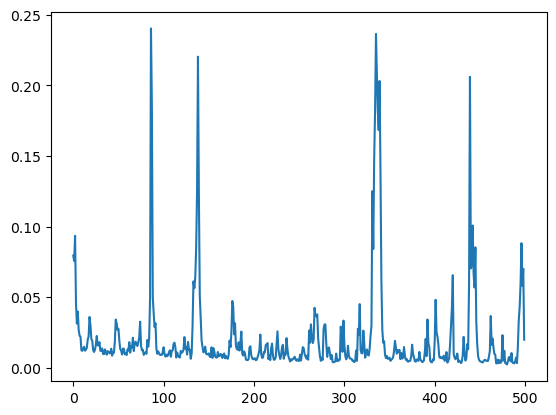

In [21]:
plt.plot(history.history["loss"])

In [ ]:
# Model Accuracy

In [19]:
scores = model.evaluate(X_data, Y_data)

12/12 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9670


In [ ]:
#  Model Accuracy @ each epoch graph

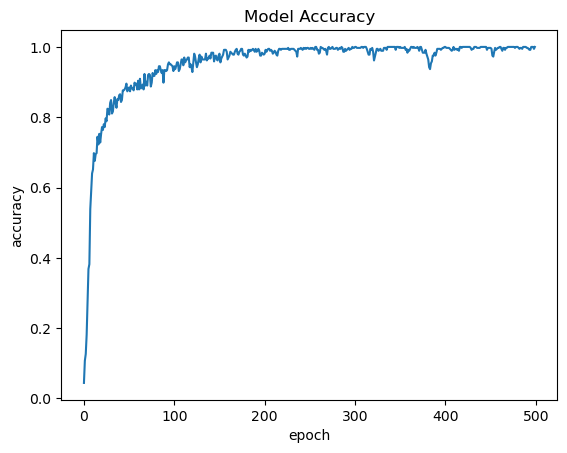

In [51]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()